In [3]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn import decomposition
from umap import UMAP
from sklearn.metrics import silhouette_score

Importing our dataset and converting it to a dataframe

In [4]:
data = load_breast_cancer(as_frame=True)
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))

Standardising our data

In [6]:
data = df[0:569]
data = np.asarray(data)
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [7]:
scaled_data = StandardScaler().fit_transform(data)
print(scaled_data.shape)

(569, 31)


Using the Elbow method to find the best number of clusters to use. 
Step 1. create function where we check the inertia for a range of clusters (1-10)
Step 2. plot our results and chose our number of clusters

In [8]:
no_clusters = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_data)
    no_clusters.append(kmean.inertia_)

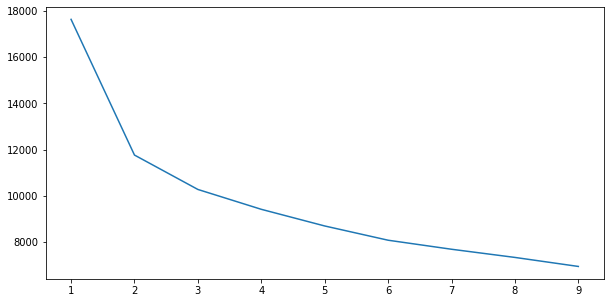

In [9]:
plt.figure(figsize=(10,5))
plt.plot(K, no_clusters)
plt.show()

Plotting the data with and without KMeans

In [10]:
model = KMeans(n_clusters=2)
model.fit(scaled_data)
labels = model.predict(scaled_data)

Text(0.5, 1.0, 'With KMeans')

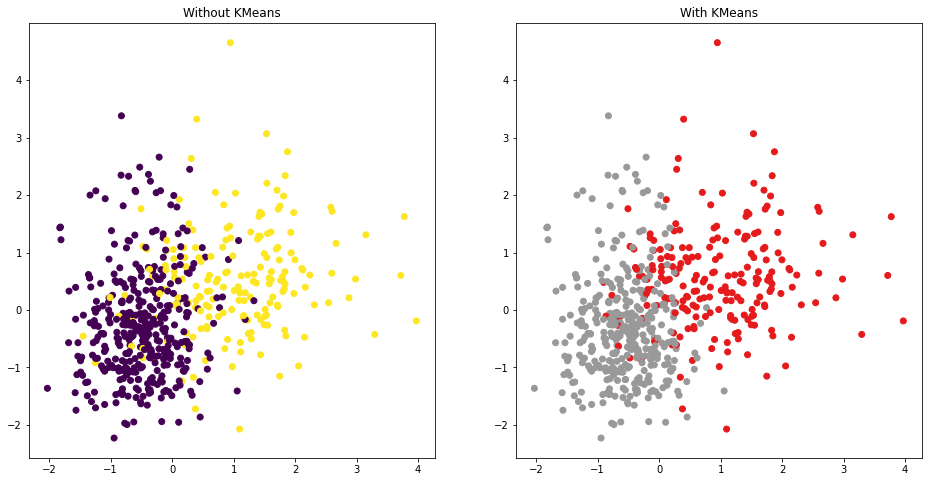

In [11]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(x1, y1, c=labels)
ax[1].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[0].set_title('Without KMeans')
ax[1].set_title('With KMeans')

We can se that we've got a few more overlapping datapoints without KMeans

Plotting with UMAP

In [23]:
umap = UMAP()
umap_fitted = umap.fit_transform(scaled_data)

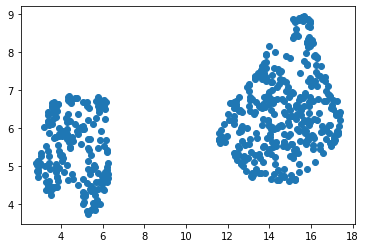

In [24]:
plt.scatter(umap_fitted[:,0], umap_fitted[:,1])
plt.show()

PCA - optimising our data and doing the above steps again

In [14]:
pca = decomposition.PCA(n_components = 31)
pca_data = pca.fit_transform(scaled_data)

In [15]:
model = KMeans(n_clusters=2)
model.fit(pca_data)
pca_labels = model.predict(pca_data)

Plotting initial data, KMeans and KMeans after PCA

Text(0.5, 1.0, 'PCA KMeans')

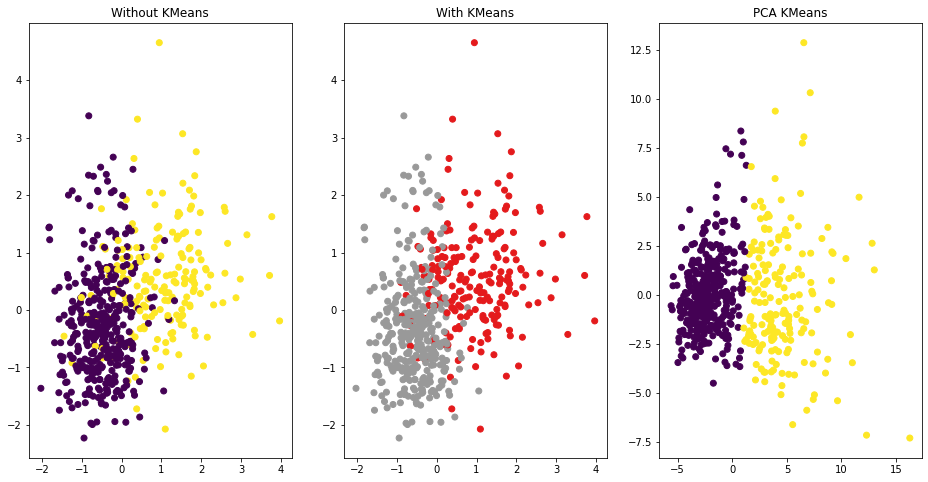

In [16]:
x1 = scaled_data[:,0]
y1 = scaled_data[:,1]
x2 = scaled_data[:,0]
y2 = scaled_data[:,1]
x3 = pca_data[:,0]
y3 = pca_data[:,1]
fig, ax = plt.subplots(1, 3, figsize=(16,8))
ax[0].scatter(x1, y1, c=labels)
ax[1].scatter(x2, y2, c=df['target'], cmap=plt.cm.Set1)
ax[2].scatter(x3, y3, c=pca_labels)
ax[0].set_title('Without KMeans')
ax[1].set_title('With KMeans')
ax[2].set_title('PCA KMeans')

Plotting PCA KMeans with UMAP

In [25]:
umap_pca = UMAP()
umap_pca_fitted = umap.fit_transform(pca_data)

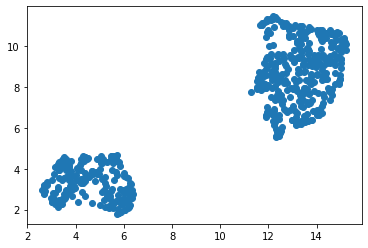

In [26]:
plt.scatter(umap_pca_fitted[:,0], umap_pca_fitted[:,1])
plt.show()

Final thoughts on PCA vs non-PCA:
Looking at our plots we can see that PCA helped KMeans eliminate overlapping datapoints.
In UMAP we can also see that PCA helped tighten up our clusters.